In [6]:
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


https://matplotlib.org/tutorials/introductory/customizing.html

In [7]:
mpl.rcParams['figure.figsize'] = (12,10)


    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(url, names= column_names, delim_whitespace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
df.loc[df.horsepower == '?', 'horsepower'] = np.nan
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['full_date'] = pd.to_datetime(df.year, format='%y')
df['year'] = df['full_date'].dt.year
df.dtypes

mpg                    float64
cylinders                int64
displacement           float64
horsepower             float64
weight                 float64
acceleration           float64
year                     int64
origin                   int64
name                    object
full_date       datetime64[ns]
dtype: object

## Graph formatting


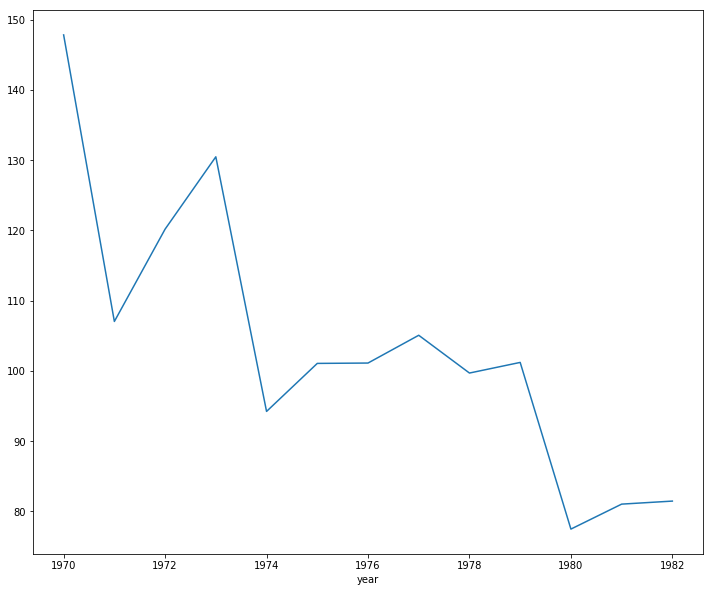

In [56]:
df.groupby('year')['horsepower'].mean().plot()

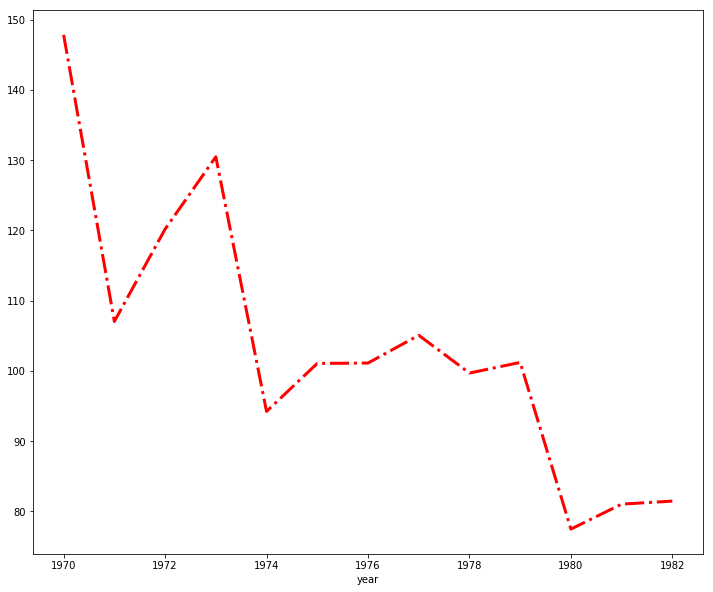

In [54]:
df.groupby('year')['horsepower'].mean().plot(ls='-.', color='r', lw=3)

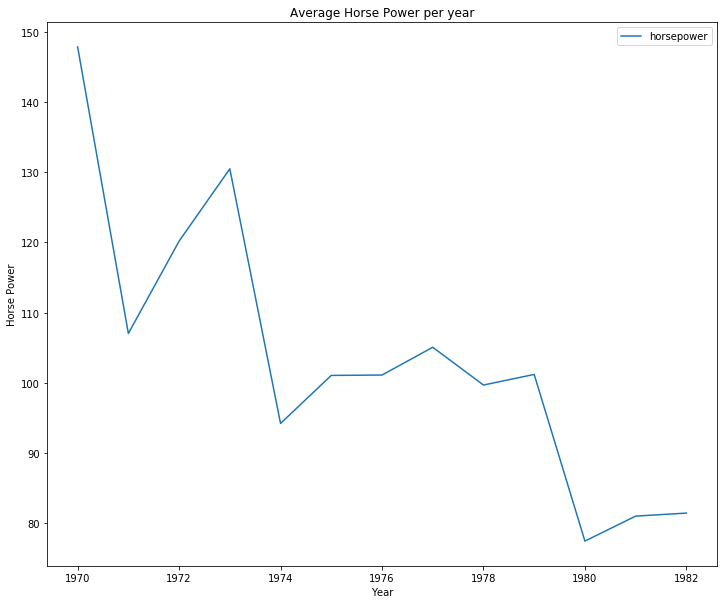

In [11]:
fig, axes = plt.subplots()
df.groupby('year')['horsepower'].mean().plot(ax = axes)
_ = axes.set(
    title="Average Horse Power per year",
    xlabel="Year",
    ylabel="Horse Power"
    
)
axes.legend()

## Scatter plots

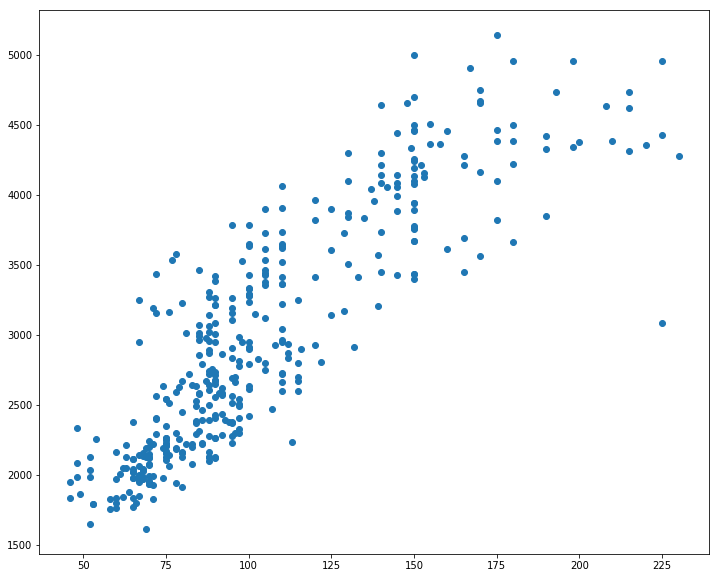

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = df['horsepower'], y=df['weight'])

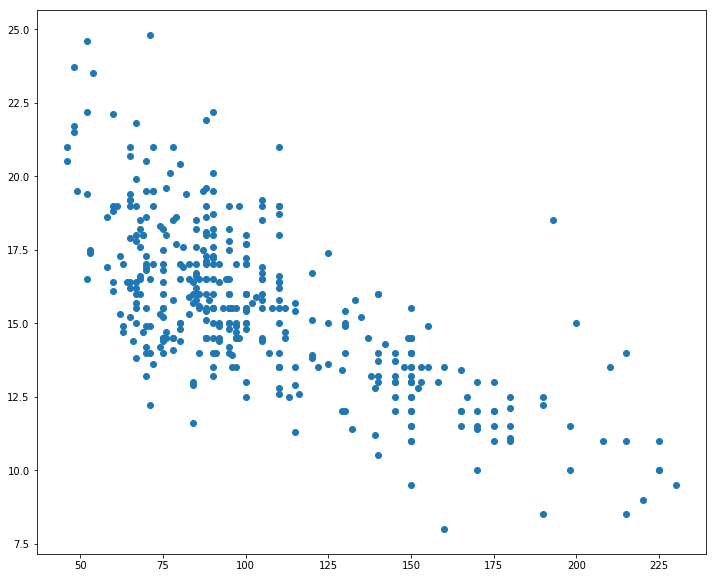

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = df['horsepower'], y= df['acceleration'])

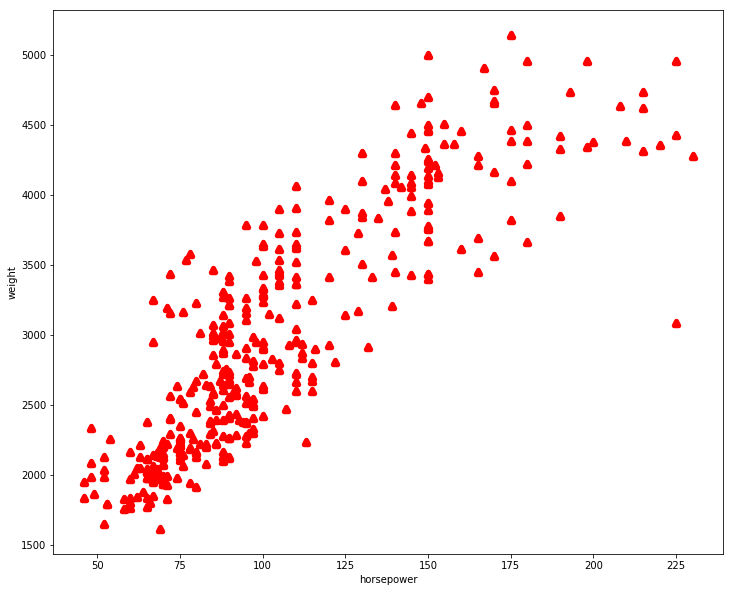

In [63]:
df.plot(kind='scatter', x='horsepower', y='weight', lw=5, color='red', marker='^')

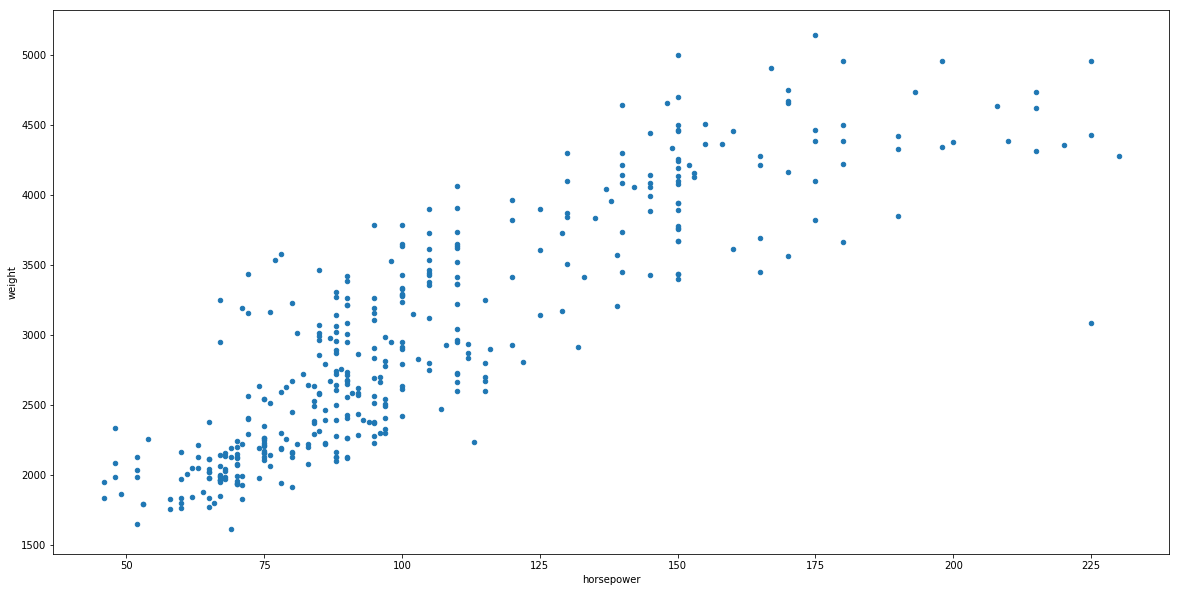

In [66]:
fig, ax = plt.subplots()
df.plot(kind='scatter', x='horsepower', y='weight', ax =ax, figsize=(20,10))

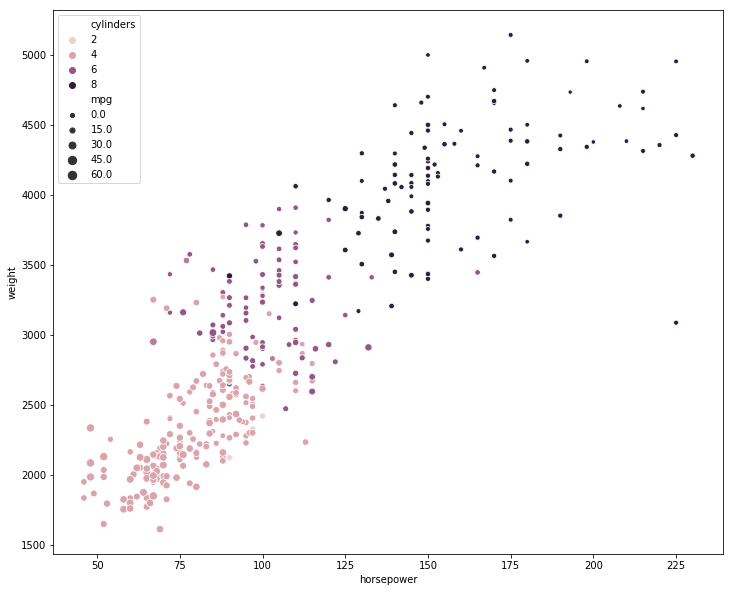

In [15]:
sns.scatterplot(data=df, x='horsepower', y='weight', hue='cylinders', size='mpg')

## Boxplot

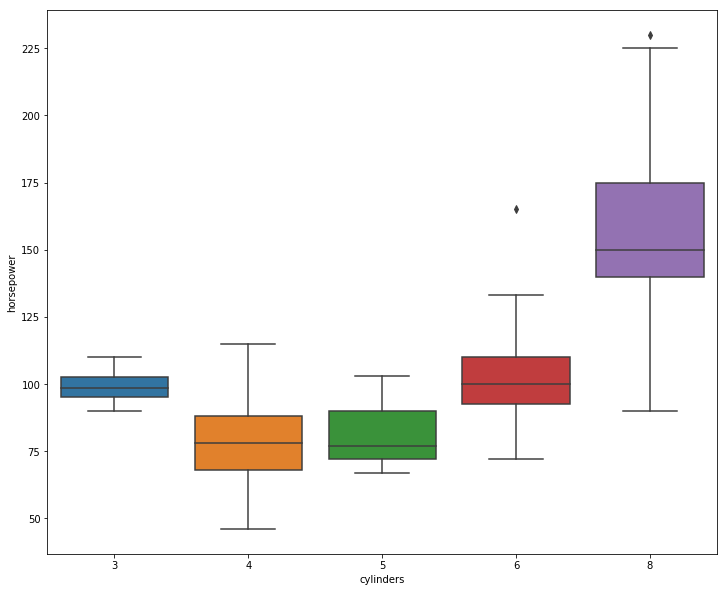

In [16]:
sns.boxplot(data=df, x="cylinders", y="horsepower")

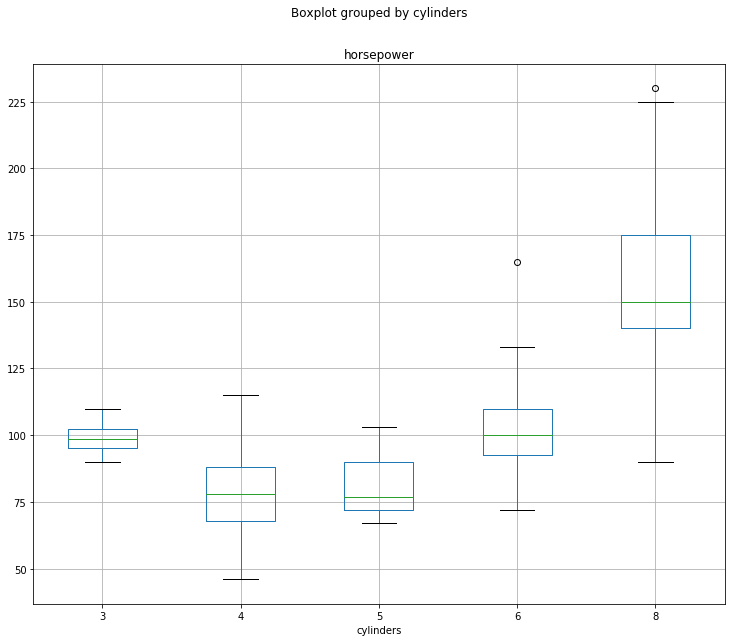

In [46]:
df.boxplot(column='horsepower', by='cylinders')


In [17]:
df['decade'] = df.full_date.dt.year // 10 * 10

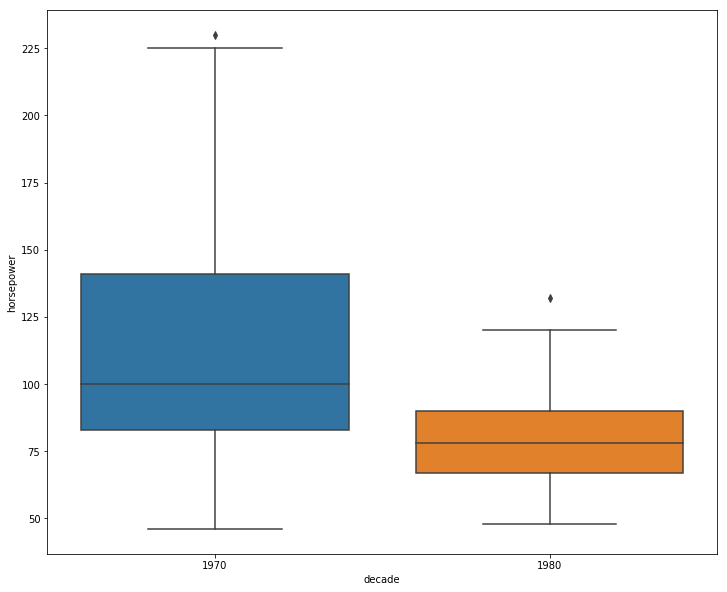

In [18]:
sns.boxplot(data=df, x='decade', y='horsepower')

## Histogram

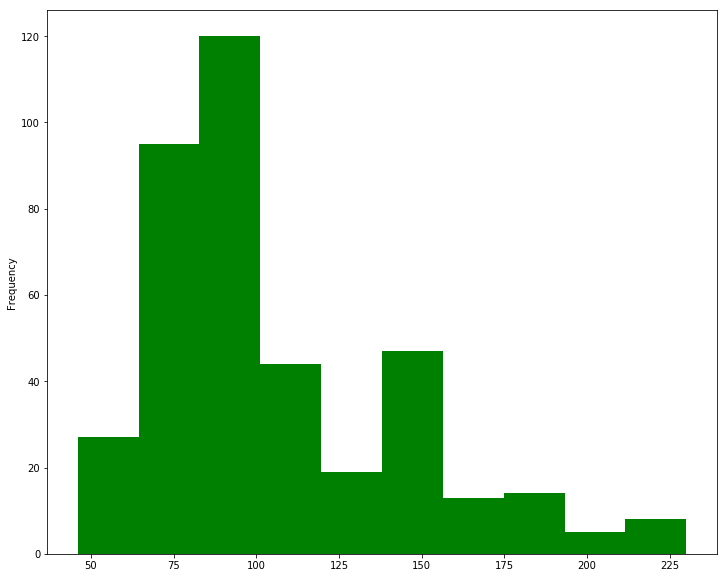

In [65]:
df.horsepower.plot(kind='hist', color='green')

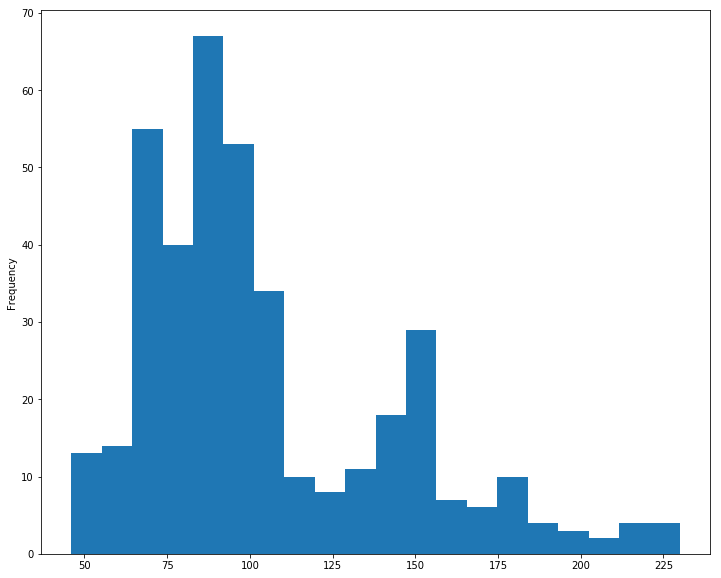

In [21]:
df.horsepower.plot(kind='hist', bins=20)

(array([15., 56., 51., 89., 46., 29., 15., 15., 36.,  8., 15.,  4.,  3.,
         5.,  5.]),
 array([ 46.        ,  58.26666667,  70.53333333,  82.8       ,
         95.06666667, 107.33333333, 119.6       , 131.86666667,
        144.13333333, 156.4       , 168.66666667, 180.93333333,
        193.2       , 205.46666667, 217.73333333, 230.        ]),
 <a list of 15 Patch objects>)

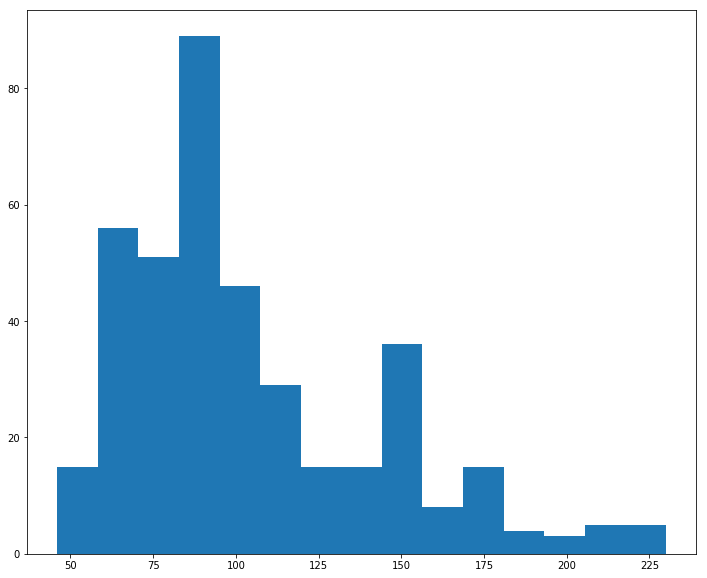

In [23]:
plt.hist(df.horsepower.sort_values(), bins=15)

In [67]:
print(plt.style.available)

['seaborn-bright', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-colorblind', 'classic', 'fivethirtyeight', 'seaborn-poster', 'seaborn-notebook', 'dark_background', 'seaborn-pastel', 'seaborn-deep', 'seaborn-dark', 'Solarize_Light2', 'seaborn-darkgrid', 'tableau-colorblind10', '_classic_test', 'bmh', 'ggplot', 'seaborn-whitegrid', 'seaborn-talk', 'grayscale', 'seaborn', 'seaborn-muted', 'seaborn-paper', 'fast', 'seaborn-white']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2915fd2c18>]],
      dtype=object)

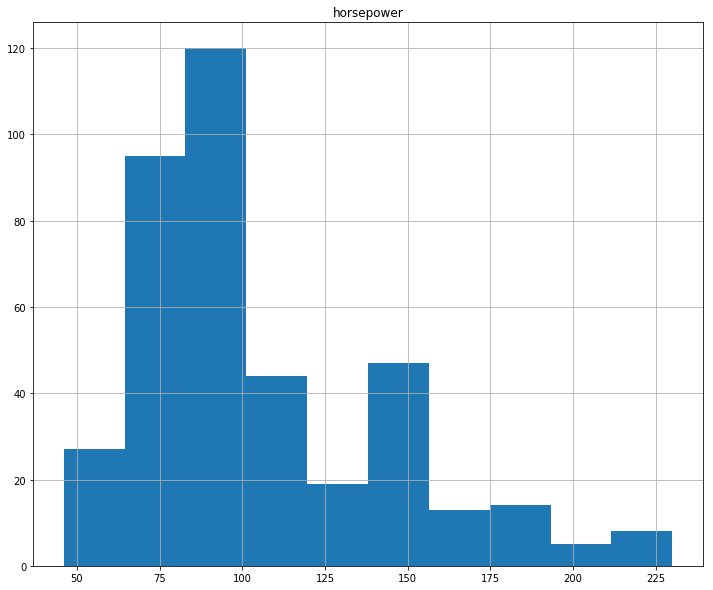

In [68]:
df.hist(column='horsepower')